### Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import os
import copy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

&nbsp;

### Loading Dataset

In [93]:
filepath = os.getcwd() + "/iris.csv"
df = pd.read_csv(filepath)
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


&nbsp;

### Train Test Split

In [94]:
X = df.drop(['class'],axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =101)

&nbsp;

### Hyperparameters Optimization

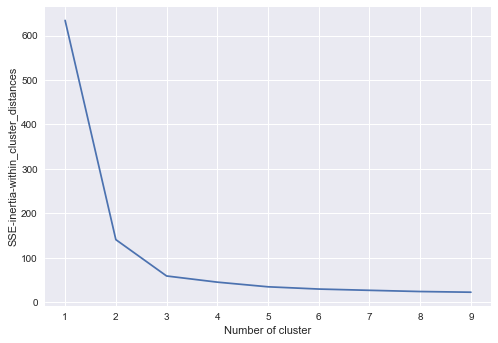

In [107]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(X_train)
    #x["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE-inertia-within_cluster_distances")
plt.show()

### Key Note:
* At cluster 3, we have elbow steeve, which is optimal number of clusters
* If only 1 cluster huge distances between data points and centriod.
* If 2 clusters then intra distance b/n data points and centriods are reduced, because of having strong 2 clusters in the internal data.
* If 3 clusters then intra distance b/n data points and centriods are further decreased, because there is still reasonal 3 natural clusters in the internal data.

&nbsp;

### Best model parameters as per elbow curve of sse

In [96]:
kmeans = KMeans(n_clusters=3, max_iter=100).fit(X_train)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Key Note:
* Mostly it works on llyods algorithm internally.
* Instead of random centriods installation, it chooses k-means++ technique for centriods initialisation which is more better for stability of model.
* max_iter 100, it runs 100 loops for updating centriods during checking of nearest points to centriods.
* n_jobs like multi threading
* precompute_distances='auto' like calculating distance between data points.
* n_init=10, centriods are intialised 10 times and executed 100 times loop for each time initialisation

&nbsp;

### Model Fit

In [97]:
kmeans = KMeans(n_clusters=3, max_iter=100).fit(X_train)
X_train['clusters'] = kmeans.labels_
df_kmeans = copy.deepcopy(X_train)
df_kmeans['class'] = y_train
df_kmeans.head()

,sepallength,sepalwidth,petallength,petalwidth,clusters,class
104,6.5,3.0,5.8,2.2,2,Iris-virginica
89,5.5,2.5,4.0,1.3,1,Iris-versicolor
116,6.5,3.0,5.5,1.8,2,Iris-virginica
82,5.8,2.7,3.9,1.2,1,Iris-versicolor
112,6.8,3.0,5.5,2.1,2,Iris-virginica


&nbsp;

### Visualizing Kmeans Model Results

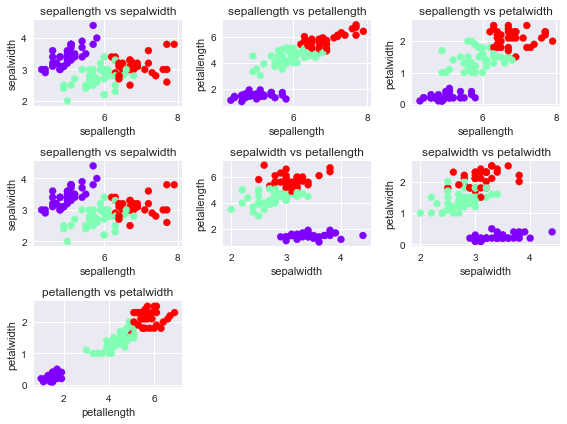

In [102]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(8,6))
axes[0][0].scatter(df_kmeans['sepallength'],df_kmeans['sepalwidth'],c=df_kmeans['clusters'],marker='o',cmap='rainbow')
axes[0][0].title.set_text("sepallength vs sepalwidth")
axes[0][0].set_xlabel("sepallength")
axes[0][0].set_ylabel("sepalwidth")

axes[0][1].scatter(df_kmeans['sepallength'],df_kmeans['petallength'],c=df_kmeans['clusters'],marker='o',cmap='rainbow')#cmap='nipy_spectral'
axes[0][1].title.set_text("sepallength vs petallength")
axes[0][1].set_xlabel("sepallength")
axes[0][1].set_ylabel("petallength")

axes[0][2].scatter(df_kmeans['sepallength'],df_kmeans['petalwidth'],c=df_kmeans['clusters'],marker='o',cmap='rainbow')
axes[0][2].title.set_text("sepallength vs petalwidth")
axes[0][2].set_xlabel("sepallength")
axes[0][2].set_ylabel("petalwidth")

axes[1][0].scatter(df_kmeans['sepallength'],df_kmeans['sepalwidth'],c=df_kmeans['clusters'],marker='o',cmap='rainbow')
axes[1][0].title.set_text("sepallength vs sepalwidth")
axes[1][0].set_xlabel("sepallength")
axes[1][0].set_ylabel("sepalwidth")

axes[1][1].scatter(df_kmeans['sepalwidth'],df_kmeans['petallength'],c=df_kmeans['clusters'],marker='o',cmap='rainbow')
axes[1][1].title.set_text("sepalwidth vs petallength")
axes[1][1].set_xlabel("sepalwidth")
axes[1][1].set_ylabel("petallength")

axes[1][2].scatter(df_kmeans['sepalwidth'],df_kmeans['petalwidth'],c=df_kmeans['clusters'],marker='o',cmap='rainbow')
axes[1][2].title.set_text("sepalwidth vs petalwidth")
axes[1][2].set_xlabel("sepalwidth")
axes[1][2].set_ylabel("petalwidth")

axes[2][0].scatter(df_kmeans['petallength'],df_kmeans['petalwidth'],c=df_kmeans['clusters'],marker='o',cmap='rainbow')
axes[2][0].title.set_text("petallength vs petalwidth")
axes[2][0].set_xlabel("petallength")
axes[2][0].set_ylabel("petalwidth")

axes[2][1].set_visible(False)
axes[2][2].set_visible(False)


plt.style.use('seaborn')
plt.tight_layout()
plt.show()

### Key Note:
* From above scatter plots we can say, our kmeans has performed quite good on making cluters.
* Because defined cluters data points are noticebly some what away from other data points.

&nbsp;

### Predicting on new dataset

In [104]:
df_test_kmeans = copy.deepcopy(X_test)
df_test_kmeans['clusters'] = kmeans.predict(X_test)
df_test_kmeans.head()
# kmeans.labels_

,sepallength,sepalwidth,petallength,petalwidth,clusters
33,5.5,4.2,1.4,0.2,0
16,5.4,3.9,1.3,0.4,0
43,5.0,3.5,1.6,0.6,0
129,7.2,3.0,5.8,1.6,2
50,7.0,3.2,4.7,1.4,1


&nbsp;

### Visualizing Kmeans model predictions On New Data

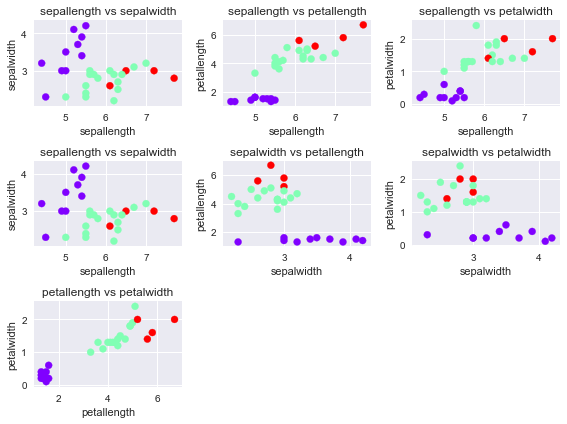

In [105]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(8,6))
axes[0][0].scatter(df_test_kmeans['sepallength'],df_test_kmeans['sepalwidth'],c=df_test_kmeans['clusters'],marker='o',cmap='rainbow')
axes[0][0].title.set_text("sepallength vs sepalwidth")
axes[0][0].set_xlabel("sepallength")
axes[0][0].set_ylabel("sepalwidth")

axes[0][1].scatter(df_test_kmeans['sepallength'],df_test_kmeans['petallength'],c=df_test_kmeans['clusters'],marker='o',cmap='rainbow')#cmap='nipy_spectral'
axes[0][1].title.set_text("sepallength vs petallength")
axes[0][1].set_xlabel("sepallength")
axes[0][1].set_ylabel("petallength")

axes[0][2].scatter(df_test_kmeans['sepallength'],df_test_kmeans['petalwidth'],c=df_test_kmeans['clusters'],marker='o',cmap='rainbow')
axes[0][2].title.set_text("sepallength vs petalwidth")
axes[0][2].set_xlabel("sepallength")
axes[0][2].set_ylabel("petalwidth")

axes[1][0].scatter(df_test_kmeans['sepallength'],df_test_kmeans['sepalwidth'],c=df_test_kmeans['clusters'],marker='o',cmap='rainbow')
axes[1][0].title.set_text("sepallength vs sepalwidth")
axes[1][0].set_xlabel("sepallength")
axes[1][0].set_ylabel("sepalwidth")

axes[1][1].scatter(df_test_kmeans['sepalwidth'],df_test_kmeans['petallength'],c=df_test_kmeans['clusters'],marker='o',cmap='rainbow')
axes[1][1].title.set_text("sepalwidth vs petallength")
axes[1][1].set_xlabel("sepalwidth")
axes[1][1].set_ylabel("petallength")

axes[1][2].scatter(df_test_kmeans['sepalwidth'],df_test_kmeans['petalwidth'],c=df_test_kmeans['clusters'],marker='o',cmap='rainbow')
axes[1][2].title.set_text("sepalwidth vs petalwidth")
axes[1][2].set_xlabel("sepalwidth")
axes[1][2].set_ylabel("petalwidth")

axes[2][0].scatter(df_test_kmeans['petallength'],df_test_kmeans['petalwidth'],c=df_test_kmeans['clusters'],marker='o',cmap='rainbow')
axes[2][0].title.set_text("petallength vs petalwidth")
axes[2][0].set_xlabel("petallength")
axes[2][0].set_ylabel("petalwidth")

axes[2][1].set_visible(False)
axes[2][2].set_visible(False)


plt.style.use('seaborn')
plt.tight_layout()
plt.show()

### Key Note:
* In new data(i.e., test data) these points might have different feature values than the kmeans trained data, thats why kmeans unable to predict cluster allocation of them neatly, like it was able to do that we can see in previuos graphs. 

&nbsp;

&nbsp;

&nbsp;

In [117]:
!python kmedoids.py

### KMediods

In [118]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

import kmedoids

# 3 points in dataset
data = np.array([[1,1], 
                [2,2], 
                [10,10]])

# distance matrix
D = pairwise_distances(data, metric='euclidean')

# split into 2 clusters
M, C = kmedoids.kMedoids(D, 2)

print('medoids:')
for point_idx in M:
    print( data[point_idx] )

print('')
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print('label {0}:　{1}'.format(label, data[point_idx]))